In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [2]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')
df = df[df['9'] <= 220]
df = df[~(df['10'] == 'Bus')]
df = df[~(df['11'] == 'Bus')]
df = df[~(df['11'] =='Any public transport ')]

In [3]:
# print the percentage counts of unique entries of column 10 and 11
print('Percentage counts of unique entries of column 10')
print(df['10'].value_counts(normalize=True)*100)

print('Percentage counts of unique entries of column 11')
print(df['11'].value_counts(normalize=True)*100)

Percentage counts of unique entries of column 10
10
Walk (ನಡಿಗೆ)                                                                                                                               61.085450
Dropped-off by friends/family members/others using two-wheeler (ಸ್ನೇಹಿತರು/ಕುಟುಂಬದ ಸದಸ್ಯರು/ಇತರರಿಂದ ದ್ವಿಚಕ್ರ ವಾಹನದಲ್ಲಿ ಡ್ರಾಪ್  ಪಡೆಯುವುದು)    16.397229
Auto Rickshaw (ಆಟೋರಿಕ್ಷಾ)                                                                                                                  12.124711
Ola/Uber car (ಓಲಾ/ಉಬರ್ ಕಾರು)                                                                                                                3.926097
Drove and parked a two-Wheeler (ದ್ವಿಚಕ್ರ ವಾಹನ ಚಾಲನೆ ಮತ್ತು ಪಾರ್ಕಿಂಗ್)                                                                        3.695150
Dropped-off by friends/family members/others using car (ಸ್ನೇಹಿತರು/ಕುಟುಂಬದ ಸದಸ್ಯರು/ಇತರರಿಂದ ಕಾರಿನಲ್ಲಿ ಡ್ರಾಪ್ ಪಡೆಯುವುದು)                       1.847575
Drove and parked a car (ಕಾರು ಚಾಲನೆ ಮತ್ತು ಪಾರ್ಕಿಂಗ್)   

In [4]:
# df['9'].mean()

# df['8'].unique()

# compute the mean of column 10a when column 8 is 'Metro' or 'Metro + Bus'
# Compute the mean of column '10a' where column '8' is 'Metro' or 'Metro + Bus'
mean_value = df.loc[(df['8'] != 'Metro') ,'9'].mean()

print(mean_value)

print(df['9'].mean(), df['11a'].mean())

55.071593533487295
55.071593533487295 9.541570438799075


In [5]:
def remove_non_english_text(text):
    return re.sub(r'\s*\([^)]*\)', '', text)

# Apply the function to the specified columns
for col in ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']:
    df[col] = df[col].apply(remove_non_english_text)

In [6]:
bicycle_dict={
 'Will use for access trip, Will use for egress trip':'Will use for both trips',
 'Will use for access trip, Will use for egress trip, Will not use for both trips':'all 3 selected',
 'Will use for access trip, Will not use for both trips':'selected 1 and 3',
 'Will use for egress trip, Will not use for both trips':'selected 2 and 3',
 'Will use for egress trip':'Will use for egress trip',
 'Will not use for both trips':'Will not use for both trips',
 'Will use for access trip':'Will use for access trip'
 }

df['12c(a)']=df['12c(a)'].map(bicycle_dict)
df['12c(b)']=df['12c(b)'].map(bicycle_dict)
df['12c(c)']=df['12c(c)'].map(bicycle_dict)
df['12c(d)']=df['12c(d)'].map(bicycle_dict)
df['12c(e)']=df['12c(e)'].map(bicycle_dict)

In [7]:
# drop the entries in 12c(a) to 12c(e) where the entries are 'all 3 selected', 'selected 1 and 3', 'selected 2 and 3'
# List of columns to check
columns_to_check = ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']

# List of entries to drop
entries_to_drop = ['all 3 selected', 'selected 1 and 3', 'selected 2 and 3']

# Drop rows that contain any of the specified entries in the specified columns
df= df[~df[columns_to_check].isin(entries_to_drop).any(axis=1)]

In [8]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)

In [9]:
display(HTML(f"<h2>Age and Gender</h2>"))

In [10]:
df['18'].unique()
age_map=['18-25 yrs ','26-35 yrs ',  '36-45 yrs ', '46-60 yrs ',
       '> 60 yrs ']

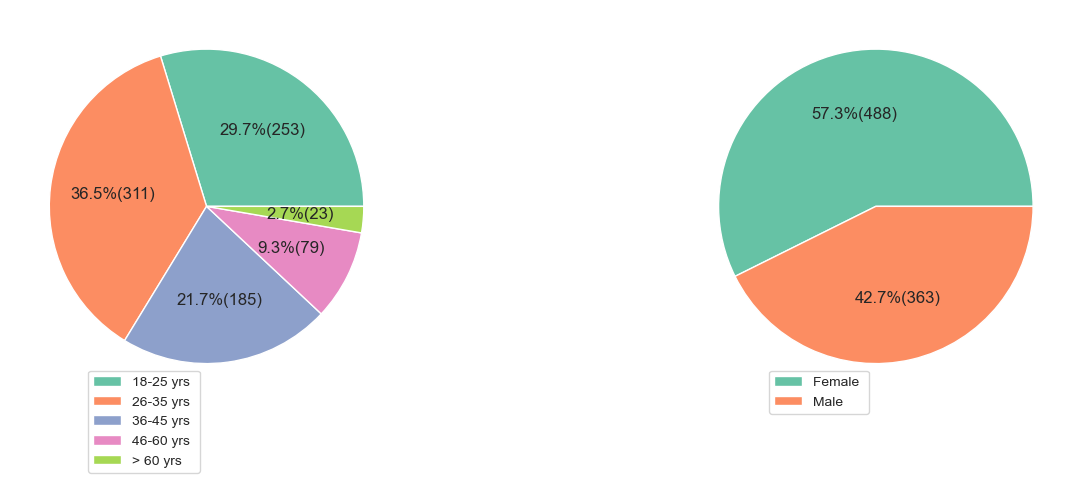

In [11]:
age_map = ['18-25 yrs ', '26-35 yrs ', '36-45 yrs ', '46-60 yrs ', '> 60 yrs ']

# Convert the '18' column to a categorical type with the specified order
df['18'] = pd.Categorical(df['18'], categories=age_map, ordered=True)

# Count the occurrences of each age group
age_counts = df['18'].value_counts().reindex(age_map)

# Define the function for pie chart labels
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%({:d})".format(pct, absolute)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set2", len(age_counts))
colors_gender = sns.color_palette("Set2", len(df['17'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts.plot.pie(autopct=lambda pct: func(pct, age_counts), ax=ax[0], shadow=False, colors=colors_age, labels=None)
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(age_labels, loc="best", bbox_to_anchor=(0.5, 0.1), fontsize='small')
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['17'].value_counts()
gender_counts.plot.pie(autopct=lambda pct: func(pct, gender_counts), ax=ax[1], shadow=False, colors=colors_gender, labels=None)
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(gender_labels, loc="best", bbox_to_anchor=(0.5, 0.1), fontsize='small')
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [12]:
display(HTML(f"<h2>Education and occupation</h2>"))

In [13]:
df['20'].unique()

array(['Employed Private ', 'Unemployed/Retired/Homemaker ', 'Student ',
       'Employed Govt. ', 'Business ', 'Daily Wage '], dtype=object)

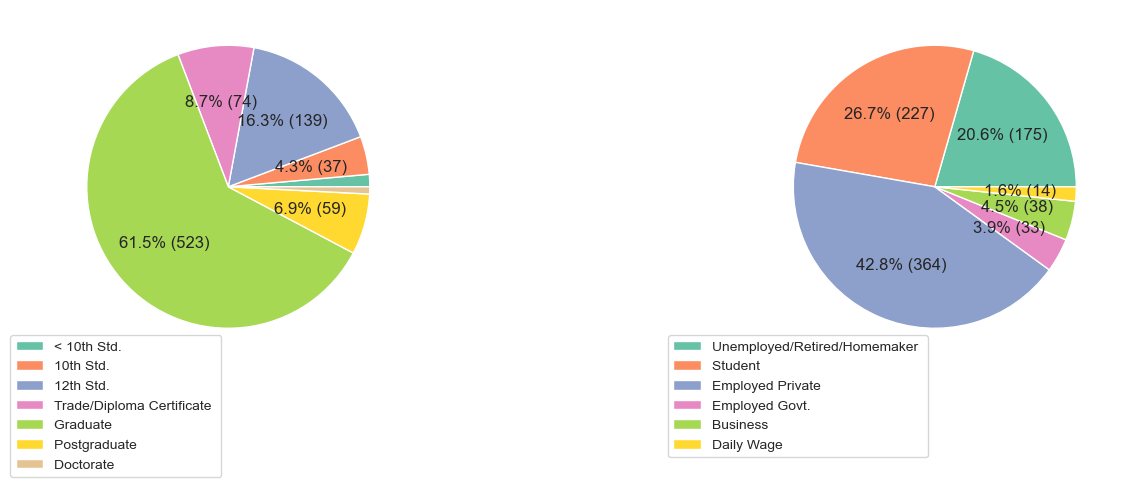

In [14]:
edu_order = ['< 10th Std. ', '10th Std. ', '12th Std. ', 'Trade/Diploma Certificate ', 'Graduate ', 
             'Postgraduate ', 'Doctorate ']
ocu_order = ['Unemployed/Retired/Homemaker ','Student ', 'Employed Private ', 'Employed Govt. ', 'Business ','Daily Wage ', ]

# Convert the '19' column to a categorical type with the specified order
df['19'] = pd.Categorical(df['19'], categories=edu_order, ordered=True)
# Convert the '20' column to a categorical type with the specified order
df['20'] = pd.Categorical(df['20'], categories=ocu_order, ordered=True)

# Define the function for pie chart labels
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}% ({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 5 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

# Helper function to get indices of top 3 sectors
def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:6]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set2", len(df['19'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['20'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for education distribution
edu_counts = df['19'].value_counts().reindex(edu_order)
top_edu_indices = get_top_indices(edu_counts.values)
edu_counts.plot.pie(
    autopct=lambda pct: func(pct, edu_counts.values, top_edu_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_ylabel('')  # Remove y-label

# Add legend for education distribution with DataFrame size
edu_labels = edu_counts.index
legend_edu = ax[0].legend(
    edu_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small'
)
plt.setp(legend_edu.get_title(), fontsize='medium', color='blue')

# Pie chart for occupation distribution
ocu_counts = df['20'].value_counts().reindex(ocu_order)
top_ocu_indices = get_top_indices2(ocu_counts.values)
ocu_counts.plot.pie(
    autopct=lambda pct: func(pct, ocu_counts.values, top_ocu_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_ylabel('')  # Remove y-label

# Add legend for occupation distribution with DataFrame size
ocu_labels = ocu_counts.index
legend_ocu = ax[1].legend(
    ocu_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small'
)
plt.setp(legend_ocu.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [15]:
display(HTML(f"<h2>Income and Vehicle ownership</h2>"))

In [16]:
def convert_value(val):
    if val == '4+':
        return 4
    else:
        return int(val)

# Apply the conversion function to the columns
df['22b'] = df['22b'].apply(convert_value)
df['22c'] = df['22c'].apply(convert_value)
df['22d'] = df['22d'].apply(convert_value)

# Sum the values of the three columns to create the 'VEH' column
df['VEH'] = df[['22b', '22c', '22d']].sum(axis=1)

# Display the DataFrame


In [17]:

# # Apply mapping to 'VEH' column
# df['VEH'] = df['VEH'].apply(lambda x: '4+' if x >= 4 else str(x))
# veh_map=[ '0','1', '2', '3', '4+']

# df['21'].unique()

income_map=['<=10,000','10,001 – 25,000','25,001 – 50,000','50,001 – 1,00,000','1,00,001 – 2,00,000',
       '>2 Lakhs',  ]

# df['VEH'].unique()

In [18]:
# Drop rows with NA in the '21' column (income) and map to categorical type
df1=df.copy()
df1 = df1.dropna(subset=['21'])
df1['21'] = pd.Categorical(df1['21'], categories=income_map, ordered=True)

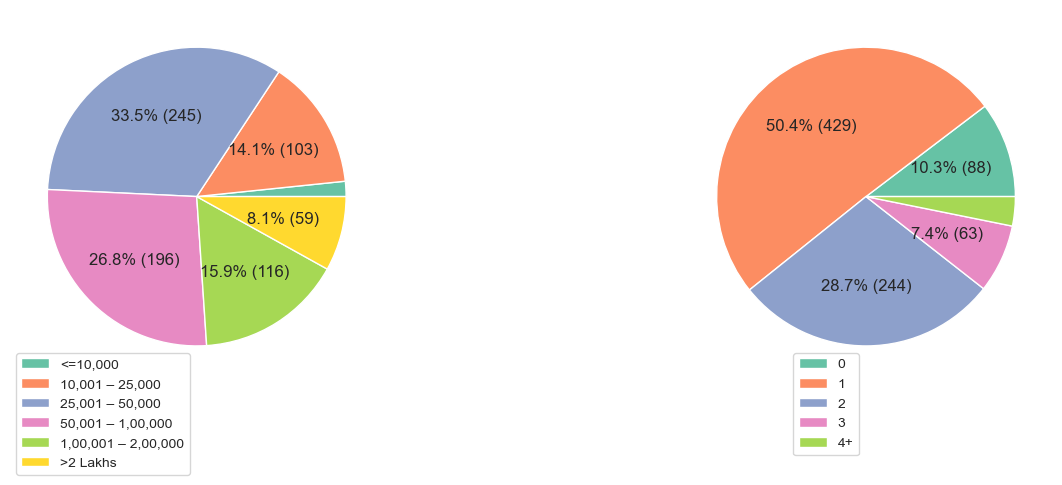

In [19]:
# Define mappings
veh_map = ['0', '1', '2', '3', '4+']
income_map = ['<=10,000', '10,001 – 25,000', '25,001 – 50,000', '50,001 – 1,00,000', '1,00,001 – 2,00,000', '>2 Lakhs']

# Apply mapping to 'VEH' column
df['VEH'] = df['VEH'].apply(lambda x: '4+' if x >= 4 else str(x))


# Define the function for pie chart labels
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}% ({:d})".format(pct, absolute)
    else:
        return ""

# Helper functions to get indices of top sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:4]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_income = sns.color_palette("Set2", len(df1['21'].value_counts()))
colors_veh = sns.color_palette("Set2", len(df['VEH'].value_counts()))


# Pie chart for income distribution
income_counts = df1['21'].value_counts().reindex(income_map)
top_income_indices = get_top_indices(income_counts.values)
income_counts.plot.pie(
    autopct=lambda pct: func(pct, income_counts.values, top_income_indices),
    ax=ax[0], shadow=False, colors=colors_income, labels=None
)
ax[0].set_ylabel('')  # Remove y-label

# Add legend for income distribution with DataFrame size
income_labels = income_counts.index
legend_income = ax[0].legend(
    income_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small'
)
plt.setp(legend_income.get_title(), fontsize='medium', color='blue')

# Pie chart for vehicle distribution
veh_counts = df['VEH'].value_counts().reindex(veh_map)
top_veh_indices = get_top_indices2(veh_counts.values)
veh_counts.plot.pie(
    autopct=lambda pct: func(pct, veh_counts.values, top_veh_indices),
    ax=ax[1], shadow=False, colors=colors_veh, labels=None
)
ax[1].set_ylabel('')  # Remove y-label

# Add legend for vehicle distribution with DataFrame size
veh_labels = veh_counts.index
legend_veh = ax[1].legend(
    veh_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small'
)
plt.setp(legend_veh.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [20]:
trip_types = {
    'Home based work': [('Home ', 'Work/Business place '), ('Work/Business place ', 'Home ')],
    'Home based education': [('Home ', 'School/College '), ('School/College ', 'Home ')],
    'Home based other': [('Home ', 'Other '), ('Other ', 'Home '),('Home ', 'Restaurant '), ('Restaurant ', 'Home '),
                         ('Home ', 'Shopping place '), ('Shopping place ', 'Home '),('Home ', 'Social/Religious place '), ('Social/Religious place ', 'Home '),
                         ('Home ', 'Friend/Relative’s place '), ('Friend/Relative’s place ', 'Home '),],
}


In [21]:
all_trips = set((row['6'], row['4']) for _, row in df.iterrows())
categorized_trips = set(trip for trips in trip_types.values() for trip in trips)
non_home_based_trips = all_trips - categorized_trips
trip_types['Non home based'] = list(non_home_based_trips)

# Calculate the number of trips and percentages
results = []
trip_totals = {}
trip_percentages = {}

for trip_type, pairs in trip_types.items():
    if trip_type == 'Non home based':
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in non_home_based_trips)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = round(trip_percentage,2)
        results.append([trip_type, 'Non home', 'Non home', total_trips])
    else:
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in pairs)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = trip_percentage
        for origin, destination in pairs:
            trip_count = len(df[(df['6'] == origin) & (df['4'] == destination)])
            results.append([trip_type, origin, destination, trip_count])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Type of trip', 'Origin', 'Destination', 'No of trips'])

# Calculate %OD based
total_trips = len(df)
results_df['%OD based'] = round(results_df['No of trips'] / total_trips * 100,2)

# Adding Sl No
results_df.insert(0, 'Sl No', range(1, len(results_df) + 1))

# Grouping by 'Type of trip'
grouped_df = results_df.groupby('Type of trip')

# Function to create a table with solid lines and centered text
def print_solid_table(df, trip_totals, trip_percentages):
    header = ["Sl No", "Type of trip", "Origin", "Destination", "No of trips", "%(type of trips)", "%OD based"]
    max_len = {col: max(df[col].astype(str).map(len).max(), len(col)) if col in df else len(col) for col in header}
    
    def draw_line():
        line = "+"
        for col in header:
            line += "-" * (max_len[col] + 2) + "+"
        print(line)

    def draw_row(row, show_type, show_sl_no, show_percentage):
        line = "|"
        for col in header:
            if col == "Type of trip" and not show_type:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "Sl No" and not show_sl_no:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "%(type of trips)" and not show_percentage:
                line += " " * (max_len[col] + 2) + "|"
            else:
                line += " " + str(row[col]).center(max_len[col]) + " |"
        print(line)

    def draw_merged_row(index, label, count, percentage):
        sl_no = str(index)
        line = "| " + sl_no.center(max_len["Sl No"]) + " | " + label.center(max_len["Type of trip"]) + " |"
        line += " " * (max_len["Origin"] + 2) + "|"
        line += " " * (max_len["Destination"] + 2) + "|"
        line += str(count).center(max_len["No of trips"] + 2) + "|"
        line += str(round(percentage, 2)).center(max_len["%(type of trips)"] + 2) + "|"
        line += " " * (max_len["%OD based"] + 2) + "|"
        print(line)

    draw_line()
    draw_row({col: col for col in header}, True, True, True)
    draw_line()
    
    sl_no = 1
    for trip_type, group in grouped_df:
        draw_merged_row(sl_no, trip_type, trip_totals[trip_type], trip_percentages[trip_type])
        type_trip_count = len(group)
        for i, (_, row) in enumerate(group.iterrows()):
            show_type = i < 0
            show_sl_no = i == -1
            draw_row(row, show_type, show_sl_no, False)
            type_trip_count -= 1
        draw_line()
        sl_no += 1

# Print the final table
print_solid_table(results_df, trip_totals, trip_percentages)

# Print the total number of samples
print(f"\nTotal number of samples: {total_trips}")

+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
| Sl No |     Type of trip     |          Origin          |       Destination        | No of trips | %(type of trips) | %OD based |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   1   | Home based education |                          |                          |     131     |      15.39       |           |
|       |                      |          Home            |     School/College       |      47     |                  |    5.52   |
|       |                      |     School/College       |          Home            |      84     |                  |    9.87   |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   2   |   Home based other   |                          |                 

In [22]:
df['8'].unique()
trip_map={'Bus + Metro ':'Bus + Metro', 'Metro ':'Metro', 'Bus + metro + metro':'Bus + Metro', 'Metro + Bus ':'Metro + Bus',
       'Bus1 + Metro + Bus2 ':'Bus1 + Metro + Bus2', 'Bus + metro1 + metro2':'Bus + Metro', 'Railway+metro ':'Metro',
       'Metro + Metro':'Metro', 'Train + metro + bus':'Metro + Bus', 'Bus ':'Metro'}
df['8']=df['8'].map(trip_map)

In [23]:
df['10'].unique()
access_map={'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ', 'Walk ':'Walk ',
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Drove and parked a car ':'Drove and parked a car ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Ola/Uber car ':'Ola/Uber car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others',
       'Rapido/uber moto/Ola App two-wheeler ':'Rapido two-wheeler ',
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido two-wheeler '}

df['10']=df['10'].map(access_map)

df['11'].unique()
egress_map={'Walk ':'Walk ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ',
       'Ola/Uber car ':'Ola/Uber car ', 'Drove and parked a car ':'Drove and parked a car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others', 
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Walk':'Walk ', 
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido two-wheeler '}

df['11']=df['11'].map(egress_map)

In [24]:
display(HTML(f"<h2>Sequence of modes</h2>"))

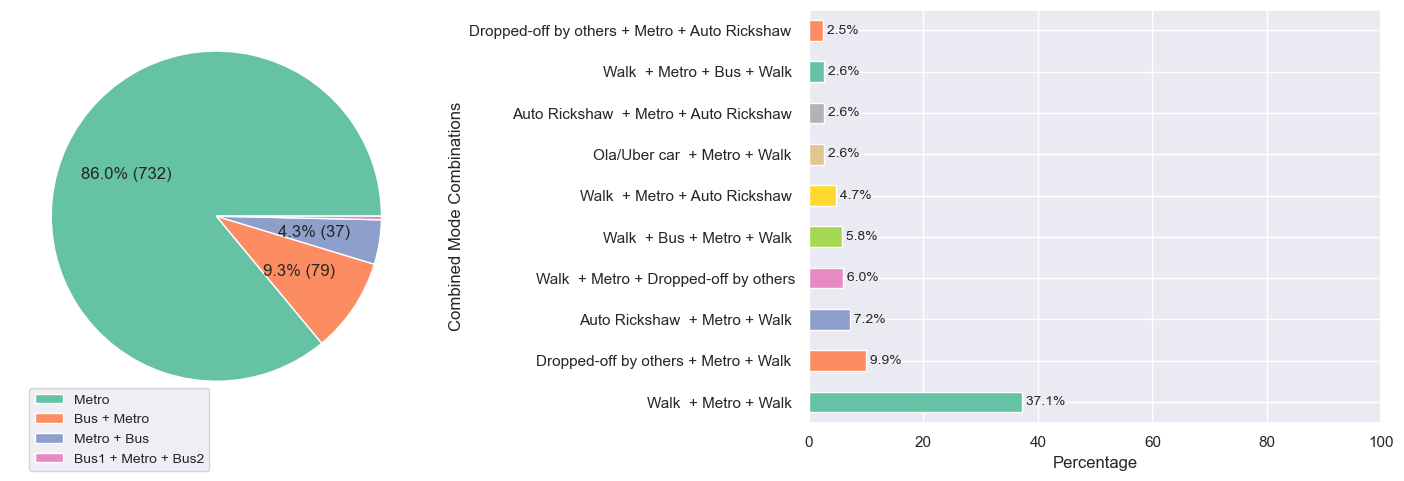

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Create a new column that combines columns 10, 8, and 11
df['combined'] = df[['10', '8', '11']].astype(str).agg(' + '.join, axis=1)

# Define the function for pie chart labels
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}% ({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top sectors
def get_top_indices(counts, n=3):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:n]

# Set Seaborn style
sns.set(style="darkgrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_gender = sns.color_palette("Set2", len(df['8'].value_counts()))
colors_combined = sns.color_palette("Set2", 10)  # Top 10 combinations

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for gender distribution
gender_counts = df['8'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[0], shadow=False, colors=colors_gender, labels=None
)
ax[0].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[0].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small'
)

# Calculate counts and percentages for combined column
combined_counts = df['combined'].value_counts()
top_combined_counts = combined_counts.nlargest(10)  # Get top 10 combinations
combined_percentages = (top_combined_counts / df_size) * 100

# Horizontal bar chart for combined distribution (percentages)
combined_percentages.plot.barh(ax=ax[1], color=colors_combined)
ax[1].set_xlabel('Percentage')
ax[1].set_ylabel('Combined Mode Combinations')
ax[1].set_xlim(0, 100)

# Add percentage labels next to the bars
for index, value in enumerate(combined_percentages):
    ax[1].text(value, index, f" {value:.1f}%", va='center',fontsize=10)

plt.tight_layout()
plt.show()


In [26]:
display(HTML(f"<h2>Door to door travel time</h2>"))

In [27]:
df1=df[df['8']!='Metro']

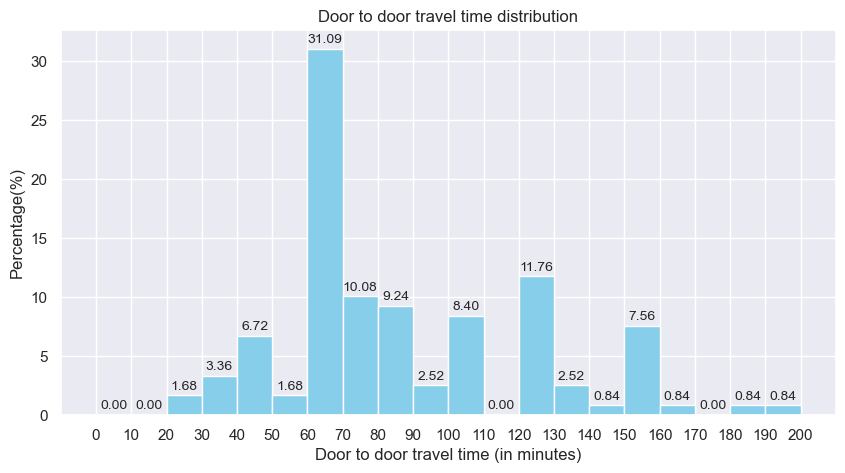

In [28]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 5))

# Calculate the total number of observations
total_count = len(df1['9'])

# Plot histogram with normalized counts to represent percentages
counts, bins, patches = plt.hist(df1['9'], bins=range(0, int(df1['9'].max()) + 10, 10), color='skyblue', weights=np.ones(total_count) / total_count * 100)

# Add labels and title
plt.xlabel('Door to door travel time (in minutes)')
plt.ylabel('Percentage(%)')
plt.title('Door to door travel time distribution')

# Add percentage on top of each bar
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 5, count + 0.5, f'{count:.2f}', ha='center', fontsize=10)

# Add total sample size below the plot
# plt.text(0, -5, f'Total Sample Size: {total_count}', color='blue', fontsize=12)

# Set x-axis labels from 0 to the maximum value in steps of 10
plt.xticks(np.arange(0, int(df['9'].max()) + 10, 10))

plt.show()


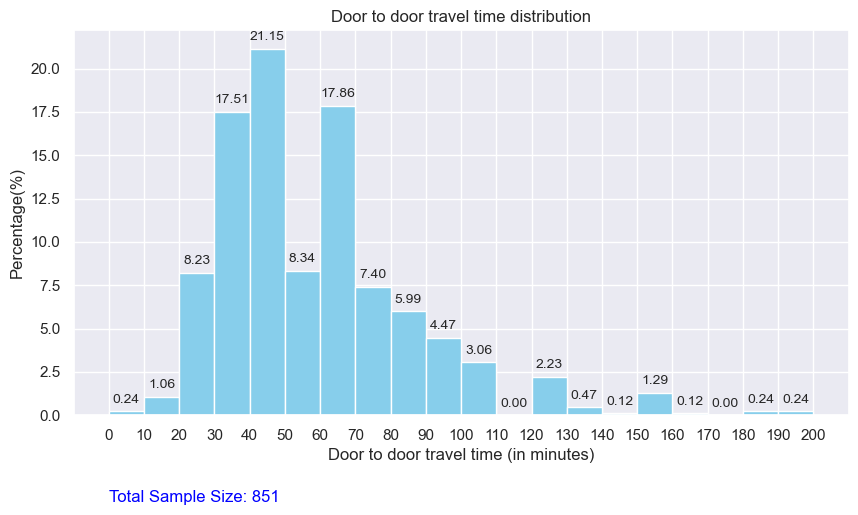

In [29]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 5))

# Calculate the total number of observations
total_count = len(df['9'])

# Plot histogram with normalized counts to represent percentages
counts, bins, patches = plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue', weights=np.ones(total_count) / total_count * 100)

# Add labels and title
plt.xlabel('Door to door travel time (in minutes)')
plt.ylabel('Percentage(%)')
plt.title('Door to door travel time distribution')

# Add percentage on top of each bar
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 5, count + 0.5, f'{count:.2f}', ha='center', fontsize=10)

# Add total sample size below the plot
plt.text(0, -5, f'Total Sample Size: {total_count}', color='blue', fontsize=12)

# Set x-axis labels from 0 to the maximum value in steps of 10
plt.xticks(np.arange(0, int(df['9'].max()) + 10, 10))

plt.show()


In [30]:
display(HTML(f"<h2>Access modes</h2>"))

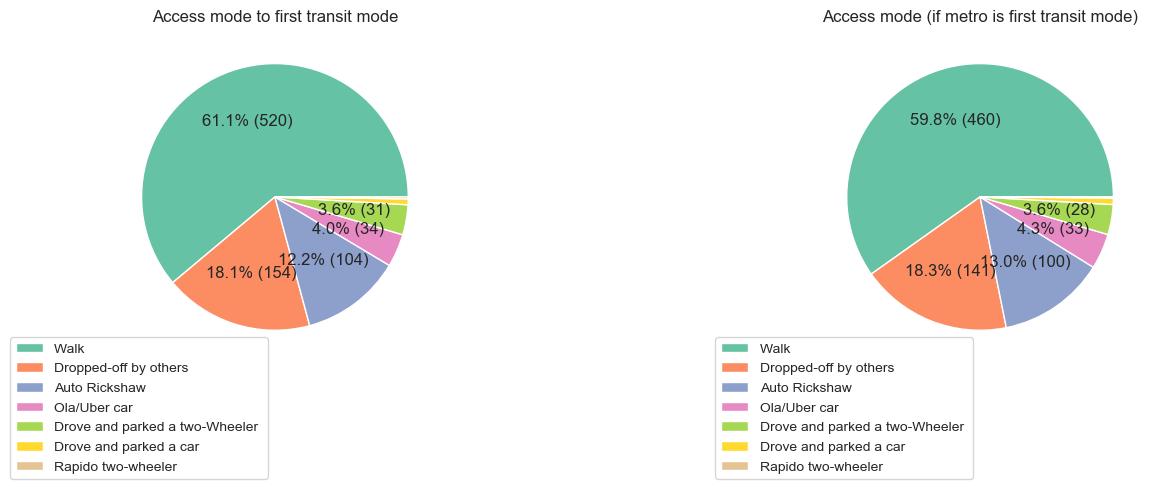

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function for pie chart labels
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}% ({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2 = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set2", len(df['10'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['10'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2 = df2.shape[0]

# Pie chart for age distribution
age_counts = df['10'].value_counts()
top_age_indices = get_top_indices2(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Access mode to first transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small')
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['10'].value_counts()
top_gender_indices = get_top_indices2(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Access mode (if metro is first transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small')

plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [32]:
display(HTML(f"<h2>Access travel time</h2>"))

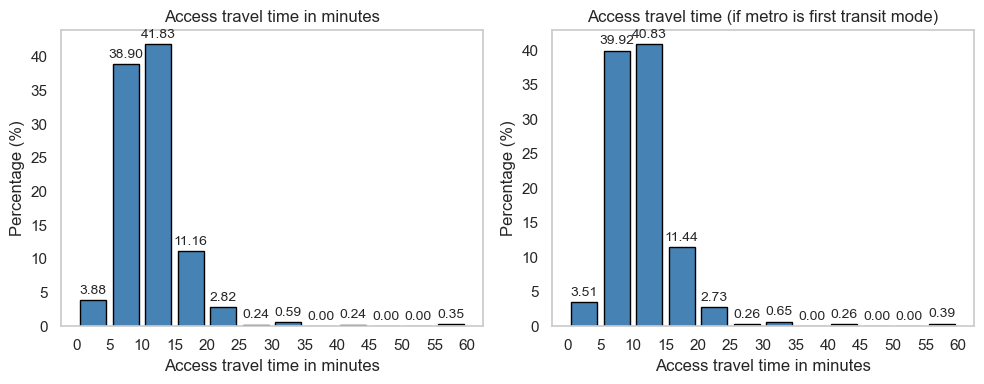

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for the left subplot
# Assuming df['10a'] contains the data for the left histogram
counts_left, bins_left, patches_left = axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 5, 5), color='steelblue', weights=np.ones(len(df['10a'])) / len(df['10a']) * 100, edgecolor='black', rwidth=0.8)

# Add labels and title for the left subplot
axs[0].set_xlabel('Access travel time in minutes')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('Access travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['10a'])
for count, bin in zip(counts_left, bins_left[:-1]):
    axs[0].text(bin + 2.5, count + 0.5, f'{count:.2f}', ha='center', va='bottom', fontsize=10)

# Plot histogram for the right subplot
df_metro = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
counts_right, bins_right, patches_right = axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 5, 5), color='steelblue', weights=np.ones(len(df_metro['10a'])) / len(df_metro['10a']) * 100, edgecolor='black', rwidth=0.8)

# Add labels and title for the right subplot
axs[1].set_xlabel('Access travel time in minutes')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Access travel time (if metro is first transit mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['10a'])
for count, bin in zip(counts_right, bins_right[:-1]):
    axs[1].text(bin + 2.5, count + 0.5, f'{count:.2f}', ha='center', va='bottom', fontsize=10)

# Set x-ticks for both subplots
xticks = range(0, int(max(df['10a'].max(), df_metro['10a'].max())) + 5, 5)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)

# Disable grid
axs[0].grid(False)
axs[1].grid(False)

plt.tight_layout()
plt.show()



In [34]:
display(HTML(f"<h2>Access distance</h2>"))

In [35]:
df['8'].unique()

array(['Bus + Metro', 'Metro', 'Metro + Bus', 'Bus1 + Metro + Bus2'],
      dtype=object)

In [36]:
display(HTML(f"<h2>Egress modes</h2>"))

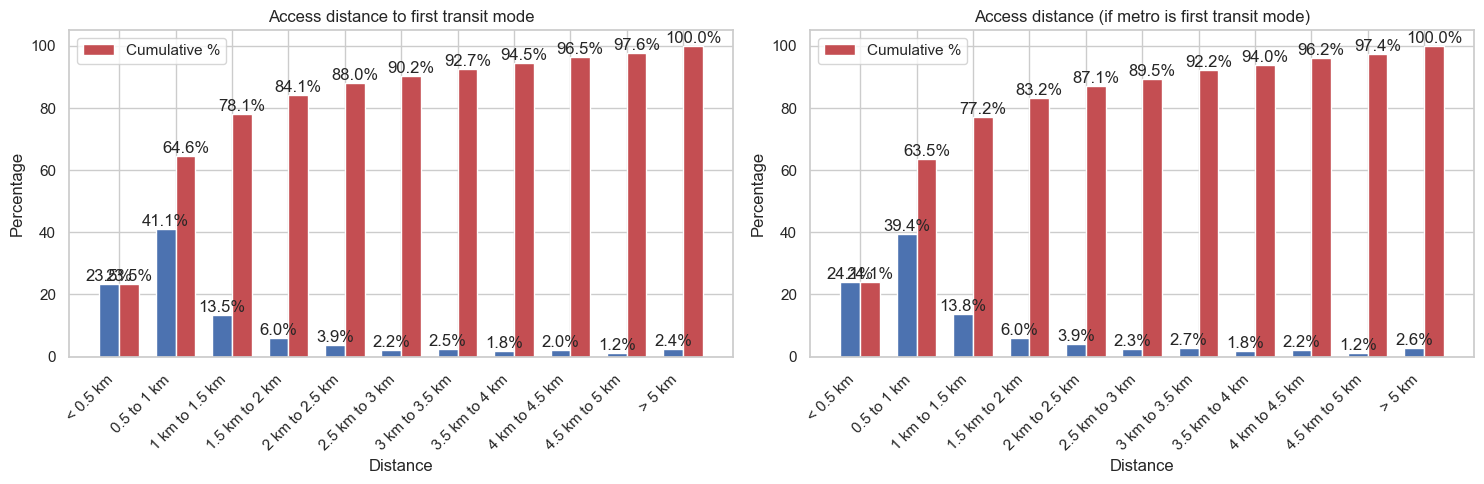

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define distance bins
dist_map = ['< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ', '1.5 km to 2 km ', '2 km to 2.5 km ', '2.5 km to 3 km ',
            '3 km to 3.5 km ', '3.5 km to 4 km ', '4 km to 4.5 km ', '4.5 km to 5 km ', '> 5 km ']

# Filter data
df2 = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]

# Calculate counts and cumulative percentages
def calculate_counts_and_cumulative(df, column, bins):
    counts = df[column].value_counts().reindex(bins, fill_value=0)
    normalized_counts = counts / counts.sum() * 100
    cumulative = counts.cumsum() / counts.sum() * 100
    return normalized_counts, cumulative

# Get counts and cumulative percentages for the whole dataset
age_counts, age_cumulative = calculate_counts_and_cumulative(df, '10b', dist_map)

# Get counts and cumulative percentages for the filtered dataset
gender_counts, gender_cumulative = calculate_counts_and_cumulative(df2, '10b', dist_map)

# Plot bar charts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Width of the bars
width = 0.35  

# X-axis locations for the groups
x = np.arange(len(dist_map))

# Bar chart for age distribution
bar1 = ax[0].bar(x - width/2, age_counts.values, width, label=None, color='b')
bar2 = ax[0].bar(x + width/2, age_cumulative.values, width, label='Cumulative %', color='r')

# Adding the labels
ax[0].set_title('Access distance to first transit mode')
ax[0].set_ylabel('Percentage')
ax[0].set_xlabel('Distance')
ax[0].set_xticks(x)
ax[0].set_xticklabels(dist_map, rotation=45, ha='right')
ax[0].legend()

# Add text labels on bar chart
for idx in range(len(dist_map)):
    ax[0].text(x[idx] - width/2, age_counts.values[idx], f'{age_counts.values[idx]:.1f}%', ha='center', va='bottom')
    ax[0].text(x[idx] + width/2, age_cumulative.values[idx], f'{age_cumulative.values[idx]:.1f}%', ha='center', va='bottom')

# Bar chart for gender distribution
bar3 = ax[1].bar(x - width/2, gender_counts.values, width, label=None, color='b')
bar4 = ax[1].bar(x + width/2, gender_cumulative.values, width, label='Cumulative %', color='r')

# Adding the labels
ax[1].set_title('Access distance (if metro is first transit mode)')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Distance')
ax[1].set_xticks(x)
ax[1].set_xticklabels(dist_map, rotation=45, ha='right')
ax[1].legend()

# Add text labels on bar chart
for idx in range(len(dist_map)):
    ax[1].text(x[idx] - width/2, gender_counts.values[idx], f'{gender_counts.values[idx]:.1f}%', ha='center', va='bottom')
    ax[1].text(x[idx] + width/2, gender_cumulative.values[idx], f'{gender_cumulative.values[idx]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


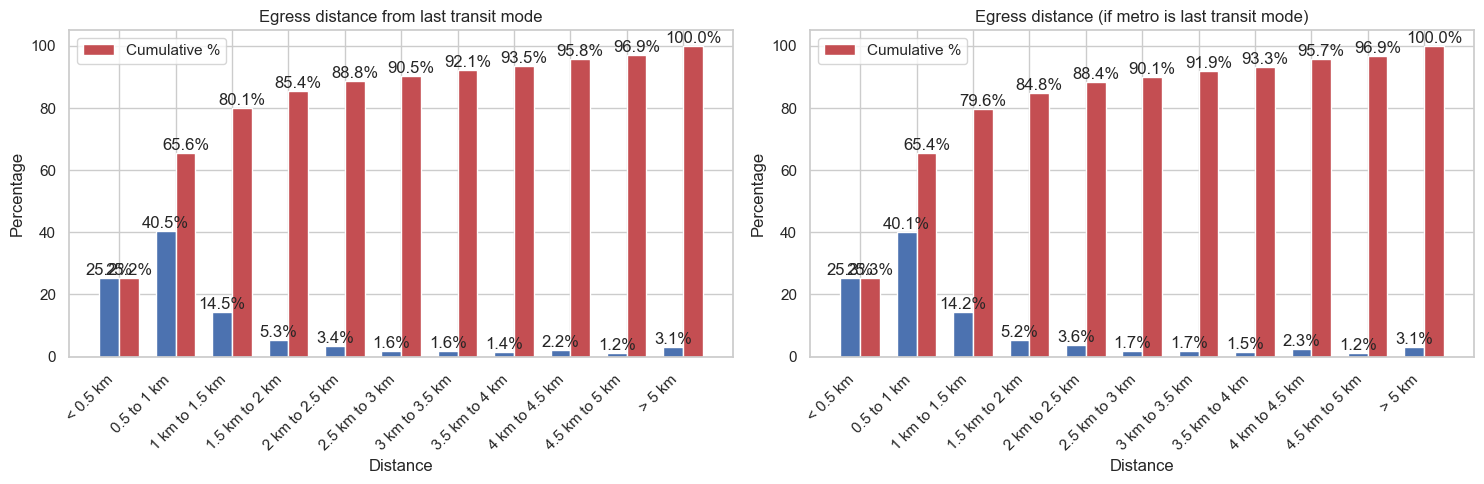

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define distance bins
dist_map = ['< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ', '1.5 km to 2 km ', '2 km to 2.5 km ', '2.5 km to 3 km ',
            '3 km to 3.5 km ', '3.5 km to 4 km ', '4 km to 4.5 km ', '4.5 km to 5 km ', '> 5 km ']

# Filter data
df2 = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Bus + Metro')]

# Calculate counts and cumulative percentages
def calculate_counts_and_cumulative(df, column, bins):
    counts = df[column].value_counts().reindex(bins, fill_value=0)
    normalized_counts = counts / counts.sum() * 100
    cumulative = counts.cumsum() / counts.sum() * 100
    return normalized_counts, cumulative

# Get counts and cumulative percentages for the whole dataset
age_counts, age_cumulative = calculate_counts_and_cumulative(df, '11b', dist_map)

# Get counts and cumulative percentages for the filtered dataset
gender_counts, gender_cumulative = calculate_counts_and_cumulative(df2, '11b', dist_map)

# Plot bar charts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Width of the bars
width = 0.35  

# X-axis locations for the groups
x = np.arange(len(dist_map))

# Bar chart for age distribution
bar1 = ax[0].bar(x - width/2, age_counts.values, width, label=None, color='b')
bar2 = ax[0].bar(x + width/2, age_cumulative.values, width, label='Cumulative %', color='r')

# Adding the labels
ax[0].set_title('Egress distance from last transit mode')
ax[0].set_ylabel('Percentage')
ax[0].set_xlabel('Distance')
# shift the position of x ticks by 1
ax[0].set_xticks(x)
# set the labels
ax[0].set_xticklabels(dist_map, rotation=45, ha='right')
ax[0].legend()

# Add text labels on bar chart
for idx in range(len(dist_map)):
    ax[0].text(x[idx] - width/2, age_counts.values[idx], f'{age_counts.values[idx]:.1f}%', ha='center', va='bottom')
    ax[0].text(x[idx] + width/2, age_cumulative.values[idx], f'{age_cumulative.values[idx]:.1f}%', ha='center', va='bottom')

# Bar chart for gender distribution
bar3 = ax[1].bar(x - width/2, gender_counts.values, width, label=None, color='b')
bar4 = ax[1].bar(x + width/2, gender_cumulative.values, width, label='Cumulative %', color='r')

# Adding the labels
ax[1].set_title('Egress distance (if metro is last transit mode)')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Distance')
ax[1].set_xticks(x)
ax[1].set_xticklabels(dist_map, rotation=45, ha='right')
ax[1].legend()

# Add text labels on bar chart
for idx in range(len(dist_map)):
    ax[1].text(x[idx] - width/2, gender_counts.values[idx], f'{gender_counts.values[idx]:.1f}%', ha='center', va='bottom')
    ax[1].text(x[idx] + width/2, gender_cumulative.values[idx], f'{gender_cumulative.values[idx]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [39]:
display(HTML(f"<h2>Egress travel time</h2>"))

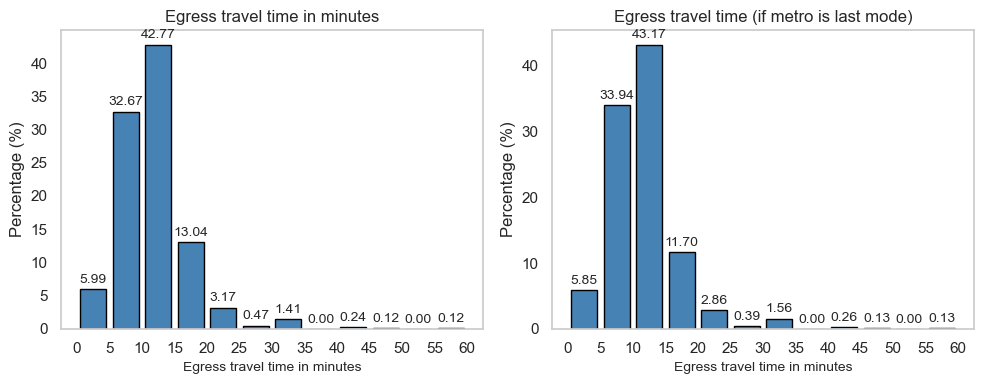

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for the left subplot
# Assuming df['10a'] contains the data for the left histogram
counts_left, bins_left, patches_left = axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 5, 5), color='steelblue', weights=np.ones(len(df['11a'])) / len(df['11a']) * 100, edgecolor='black', rwidth=0.8)

# Add labels and title for the left subplot
axs[0].set_xlabel('Egress travel time in minutes',fontsize=10)
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('Egress travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['10a'])
for count, bin in zip(counts_left, bins_left[:-1]):
    axs[0].text(bin + 2.5, count + 0.5, f'{count:.2f}', ha='center', va='bottom', fontsize=10)

# Plot histogram for the right subplot
df_metro = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
counts_right, bins_right, patches_right = axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 5, 5), color='steelblue', weights=np.ones(len(df_metro['11a'])) / len(df_metro['11a']) * 100, edgecolor='black', rwidth=0.8)

# Add labels and title for the right subplot
axs[1].set_xlabel('Egress travel time in minutes',fontsize=10)
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Egress travel time (if metro is last mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['11a'])
for count, bin in zip(counts_right, bins_right[:-1]):
    axs[1].text(bin + 2.5, count + 0.5, f'{count:.2f}', ha='center', va='bottom', fontsize=10)

# Set x-ticks for both subplots
xticks = range(0, int(max(df['11a'].max(), df_metro['11a'].max())) + 5, 5)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)

# Disable grid
axs[0].grid(False)
axs[1].grid(False)

plt.tight_layout()
plt.show()



In [41]:
display(HTML(f"<h2>Egress distance</h2>"))

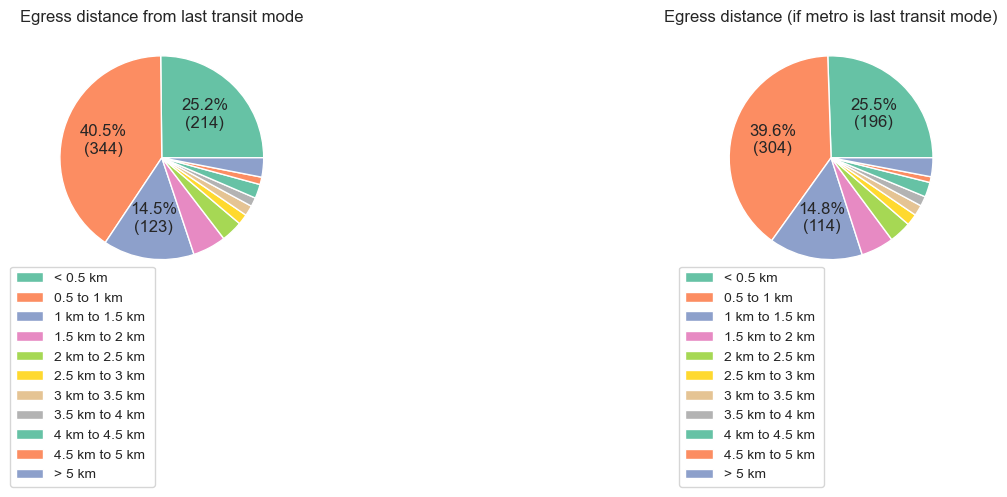

In [42]:
dist_map=['< 0.5 km ','0.5 to 1 km ',  '1 km to 1.5 km ','1.5 km to 2 km ','2 km to 2.5 km ','2.5 km to 3 km ', '3 km to 3.5 km ', '3.5 km to 4 km ', 
           '4 km to 4.5 km ', '4.5 km to 5 km ','> 5 km ']

def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Filter data
df2 = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set2", len(df['11b'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['11b'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2 = df2.shape[0]

# Pie chart for age distribution
age_counts = df['11b'].value_counts().reindex(dist_map, fill_value=0)
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Egress distance from last transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small')
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['11b'].value_counts().reindex(dist_map, fill_value=0)
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Egress distance (if metro is last transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.1),
    fontsize='small')
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [43]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

ValueError: time data "2024-05-29 08:54:11" doesn't match format "%d-%m-%Y %H:%M", at position 755. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
display(HTML(f"<h2>Crowding level in the metro ( while boarding )</h2>"))

In [ ]:
df['16'].unique()
dict={'No crowding - Less than 25% of seats occupied ':'No crowding - Less than 25% of seats occupied ',
        'No crowding  - 25-50% of seats occupied ':'No crowding  - 25-50% of seats occupied ',
       'No crowding  - 50-75% of seats occupied ':'No crowding  - 50-75% of seats occupied ',
         'No crowding  - Most ':'No crowding  - Most (>75%) of seats occupied ',
       'Low crowding - All seats AND up to 25% of standing space occupied ':'Low crowding - All seats AND up to 25% of standing space occupied ',
       'Medium crowding - All seats AND 25-50% of standing space occupied ':'Medium crowding - All seats AND 25-50% of standing space occupied ',
       'High crowding - All seats AND 50-75% of standing space occupied ':'High crowding - All seats AND 50-75% of standing space occupied ',
       'Very high crowding - All seats AND most standing space occupied ':'Very high crowding - All seats AND most standing space occupied '}
df['16']=df['16'].map(dict)

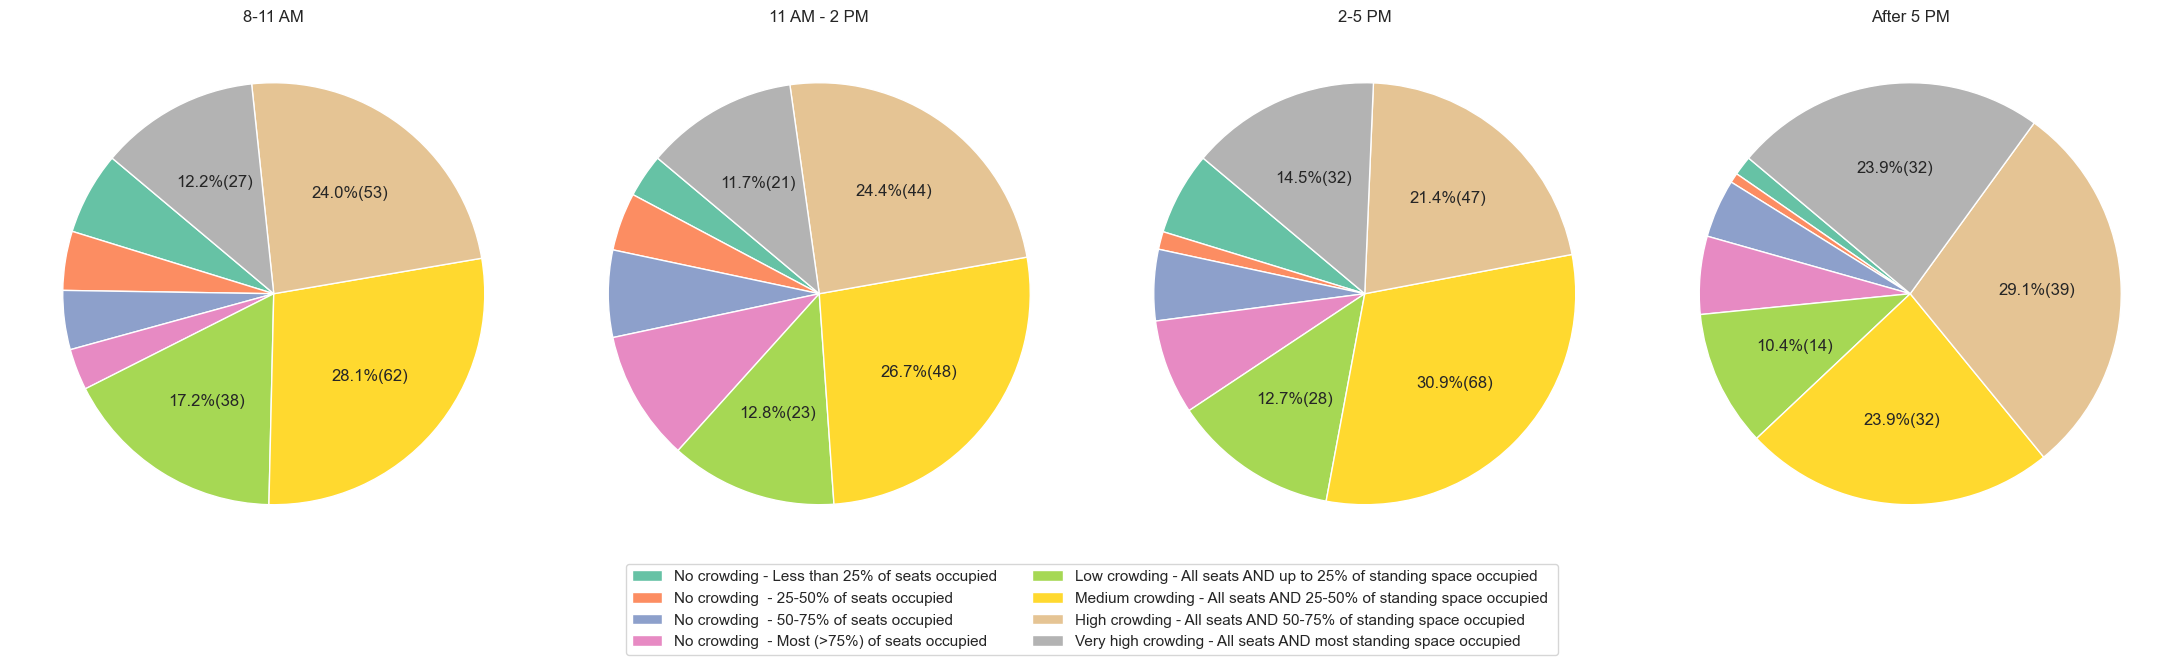

In [ ]:
# Define time intervals and labels
time_intervals = [(8, 11), (11, 14), (14, 17), (17, 20)]
labels = ['8-11 AM', '11 AM - 2 PM', '2-5 PM', 'After 5 PM']

# Define the column name
column = '16'

# Define the order
order = [ 
    'No crowding - Less than 25% of seats occupied ',
    'No crowding  - 25-50% of seats occupied ',
    'No crowding  - 50-75% of seats occupied ',
    'No crowding  - Most (>75%) of seats occupied ',
    'Low crowding - All seats AND up to 25% of standing space occupied ',
    'Medium crowding - All seats AND 25-50% of standing space occupied ',
    'High crowding - All seats AND 50-75% of standing space occupied ',
    'Very high crowding - All seats AND most standing space occupied '
]

# Calculate the number of rows required
num_rows = 1
num_cols = len(time_intervals)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(22, 15))

def func(pct, allvals):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    top_indices = allvals.argsort()[-4:][::-1]
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%({:d})".format(pct, absolute)
    else:
        return ""

# Iterate over each time interval and plot a pie chart
for i, (start, end) in enumerate(time_intervals):
    # Filter dataframe based on the time interval
    filtered_df = df[(df['Timestamp'].dt.hour >= start) & (df['Timestamp'].dt.hour < end)]
    
    # Calculate value counts for the column and reindex to match the order
    counts = filtered_df[column].value_counts().reindex(order, fill_value=0)
    
    # Plot the pie chart without labels
    axs[i].pie(counts, labels=None, autopct=lambda pct: func(pct, counts.values), startangle=140, colors=sns.color_palette("Set2", len(counts)))
    
    # Set title for the pie chart
    axs[i].set_title(labels[i])
    
    # Calculate sample size
    sample_size = len(filtered_df)
    
    

# Add a common legend for all pie charts
legend_labels = order
fig.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.35), ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show the plot
plt.show()


In [ ]:
display(HTML(f"<h2>Sample counts at different stations</h2>"))

In [ ]:
station_dict={'Nadaprabhu Kempegowda Station, Majestic ':'Majestic','Dr. B. R. Ambedkar Station, Vidhana Soudha ':'Vidhana Soudha',
              'Mantri Square Sampige Road ':'Mantri Square','Sir.M.Visvesvaraya Stn., Central College ':'Central College',
              'Benniganahalli - Tin factory ':'Benniganahalli','Whitefield - Kadugodi ':'Whitefield','Kengeri Bus Terminal ':'Kengeri BT',
              'Krishnarajapuram - K.R.Puram ':'KR Puram','Rashtreeya Vidyalaya Road ':'RV Road','Hopefarm Channasandra ':'Hopefarm',
              'Krantivira Sangolli Rayanna Railway Station ':'Krantivira','Mahakavi Kuvempu Road ':'Mahakavi Kuvempu',
              'Krishna Rajendra Market ':'KR Market','Sri Sathya Sai Hospital ':'Sathya Sai','Swami Vivekananda Road ':'Vivekananda Road',
              'Pantharapalya - Nayandahalli ':'Pantharapalya','Sri Balagangadharanatha Swamiji Station, Hosahalli ':'Hosahalli'
              ,'Rajarajeshwari Nagar ':'RR Nagar'}
df['2c']=df['2c'].map(station_dict).fillna(df['2c'])
df['2d']=df['2d'].map(station_dict).fillna(df['2d'])

In [ ]:
# Get value counts for column '2c'
value_counts_2c = df['2c'].value_counts()

# Get value counts for column '2d'
value_counts_2d = df['2d'].value_counts()

# Combine the value counts for both columns
combined_value_counts = value_counts_2c.add(value_counts_2d, fill_value=0)

combined_value_counts = combined_value_counts.astype(int)

# Sort the combined value counts in descending order
combined_value_counts_sorted = combined_value_counts.sort_values(ascending=False)

# Calculate the midpoint for splitting the data
midpoint = len(combined_value_counts_sorted) // 3

# Print the table with three pairs of stations and sample counts in a row
print("Station              Sample count      | Station              Sample count      | Station              Sample count")
print("---------------------------------------+----------------------------------------+-----------------------------------")
for i in range(min(midpoint, len(combined_value_counts_sorted))):
    station_1, count_1 = combined_value_counts_sorted.index[i], combined_value_counts_sorted.iloc[i]
    station_2, count_2 = combined_value_counts_sorted.index[midpoint + i], combined_value_counts_sorted.iloc[midpoint + i]
    station_3, count_3 = combined_value_counts_sorted.index[midpoint * 2 + i], combined_value_counts_sorted.iloc[midpoint * 2 + i]
    print(f"{station_1:<20}   {count_1:<15} | {station_2:<20}   {count_2:<15} | {station_3:<20}       {count_3:<15}")


Station              Sample count      | Station              Sample count      | Station              Sample count
---------------------------------------+----------------------------------------+-----------------------------------
Majestic               113             | Yeshwanthpur           27              | Trinity                    15             
Challaghatta           51              | Jnanabharathi          27              | Krantivira                 15             
Attiguppe              48              | Deepanjali Nagar       24              | Garudacharapalya           14             
Mahalakshmi            43              | Jayaprakash Nagar      24              | Vajarahalli                14             
Jayanagar              43              | Pattanagere            24              | Central College            14             
Vijayanagar            41              | Benniganahalli         23              | KR Market                  14             
Nagasandra       

In [ ]:
abbrevation_form_map={'Konanakunte Cross ':'KNC', 'Nagasandra ':'NAG', 'Yelachenahalli ':'YEL',
       'Mahalakshmi ':'MAH', 'Baiyappanahalli ':'BAI', 'Majestic':'MAJ', 'Mahakavi Kuvempu':'MKV', 'Vidhana Soudha':'VID', 'Mantri Square':'MAN', 'Benniganahalli':'BEN', 'Dasarahalli ':'DAS', 
       'Yeshwanthpur ':'YSH',  'Mysore Road ':'MYS', 'Trinity ':'TRI', 'Whitefield ':'WFI', 'Kadugodi Tree Park ':'KTP', 'Halasuru ':'HAS', 'Lalbagh ':'LBH', 'Jayaprakash Nagar':'JPN',
         'KR Puram':'KRP', 'Cubbon Park ':'CUB', 'Goraguntepalya ':'GOR', 'Garudacharapalya ':'GAR', 'Indiranagar ':'IND', 'RV Road':'RVR', 'Attiguppe ':'ATG', 'Jnanabharathi ':'JNA',
           'Mahatma Gandhi Road ':'MGR',  'Kengeri ':'KEN', 'Central College':'CEN', 'Nallurhalli ':'NAL', 'Vivekananda Road':'VVR', 'Magadi Road ':'MAG', 'Jayanagar ':'JAY', 'Kengeri BT':'KBT',
             'National College ':'NAT', 'Srirampura ':'SRI','South End Circle ':'SOU', 'Sandal Soap Factory ':'SAN', 'Vajarahalli ':'VAJ', 'Vijayanagar ':'VIJ', 'Rajajinagar ':'RAJ', 
             'Singayyanapalya ':'SIN', 'RR Nagar':'RRN', 'Thalaghattapura ':'THA','Hosahalli':'HOS', 'Doddakallasandra ':'DOD', 'Pantharapalya':'PAN', 'Deepanjali Nagar ':'DPN', 'Krantivira':'KRA', 
             'Seetharampalya ':'SEE', 'Hopefarm':'HOP', 'Pattandur Agrahara ':'PAT', 'Pattanagere ':'PAN', 'Kundalahalli ':'KUN', 'KR Market':'KRM', 'Peenya ':'PEN', 'Peenya Industry ':'PEI',
              'Hoodi ':'HOO', 'Silk Institute ':'SIL', 'Challaghatta ':'CHA', 'Jalahalli ':'JAL', 'Banashankari ':'BAN','Whitefield':'WHF','Jayaprakash Nagar ':'JPN','Chickpet ':'CHK',
              'Sathya Sai':'SAI'}
 

df['2c']=df['2c'].map(abbrevation_form_map).fillna(df['2c'])
df['2d']=df['2d'].map(abbrevation_form_map).fillna(df['2d'])

# df['2c'].unique()

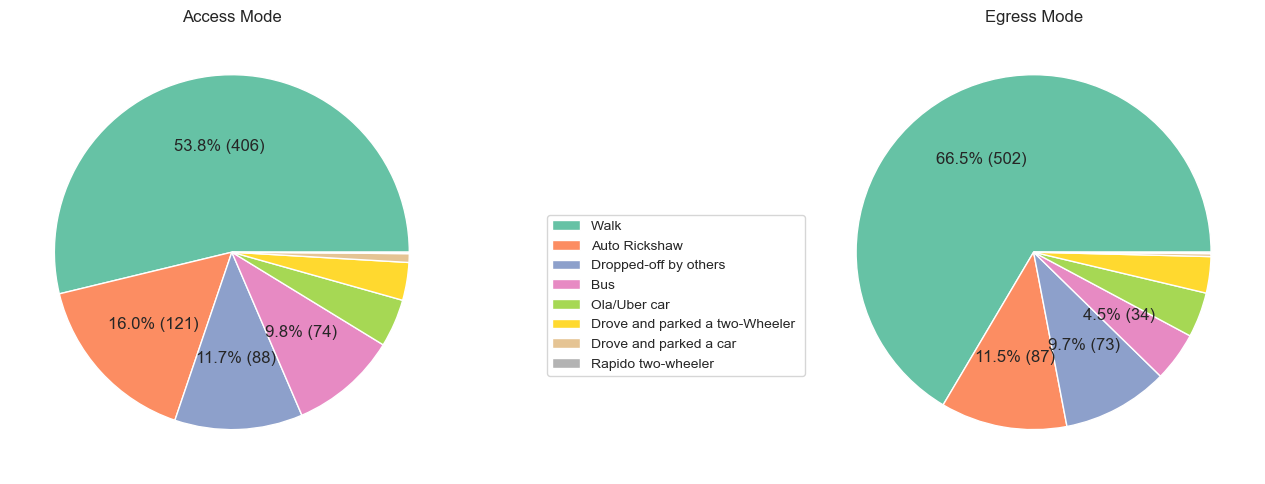

In [ ]:
df.loc[df['8'].str.contains('^Bus'), '10'] = 'Bus'
df.loc[df['8'].str.contains('Bus$'), '11'] = 'Bus'

# Define the function for pie chart labels
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}% ({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:4]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_10 = sns.color_palette("Set2", len(df['10'].value_counts()))
colors_11 = sns.color_palette("Set2", len(df['11'].value_counts()))

# Pie chart for column 10 distribution
col10_counts = df['10'].value_counts()
top_col10_indices = get_top_indices2(col10_counts.values)
col10_counts.plot.pie(
    autopct=lambda pct: func(pct, col10_counts.values, top_col10_indices),
    ax=ax[0], shadow=False, colors=colors_10, labels=None
)
ax[0].set_title('Access Mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for column 10 distribution with DataFrame size
col10_labels = col10_counts.index
# legend_col10 = ax[0].legend(
#     col10_labels, loc="best", bbox_to_anchor=(0.5, -0.1),
#     fontsize='small')
plt.setp(legend_col10.get_title(), fontsize='medium', color='blue')

# Pie chart for column 11 distribution
col11_counts = df['11'].value_counts()
top_col11_indices = get_top_indices2(col11_counts.values)
col11_counts.plot.pie(
    autopct=lambda pct: func(pct, col11_counts.values, top_col11_indices),
    ax=ax[1], shadow=False, colors=colors_11, labels=None
)
ax[1].set_title('Egress Mode')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for column 11 distribution with DataFrame size
col11_labels = col11_counts.index
legend_col11 = ax[1].legend(
    col11_labels, loc="best", bbox_to_anchor=(0,0.6),
    fontsize='small')
plt.setp(legend_col11.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [ ]:
df['10'].unique

array(['Drove and parked a two-Wheeler ', 'Walk ',
       'Dropped-off by others', 'Drove and parked a car ',
       'Auto Rickshaw ', 'Ola/Uber car ', 'Rapido two-wheeler '],
      dtype=object)

In [ ]:
display(HTML(f"<h2>Access mode to metro across different metro stations</h2>"))

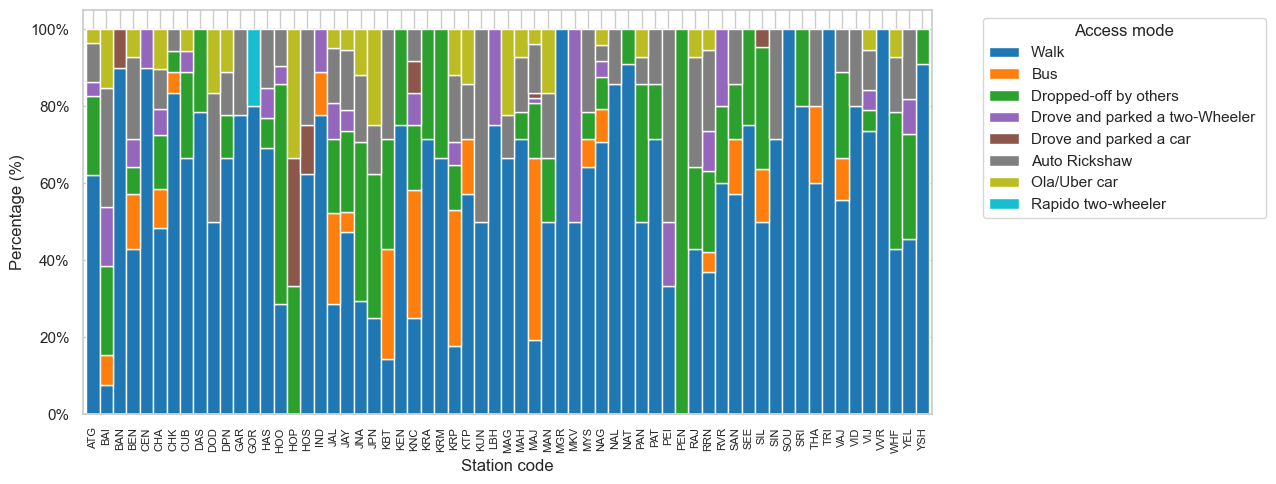

In [ ]:
# Grouping by '2c' and '10' and calculating the percentages
grouped = df.groupby(['2c', '10']).size().unstack().div(df.groupby('2c').size(), axis=0)

# Reorder the columns so that 'Walk' and other modes appear from the bottom
access_mode_order = ['Walk ','Bus',  'Dropped-off by others',
       'Drove and parked a two-Wheeler ', 'Drove and parked a car ',
       'Auto Rickshaw ', 'Ola/Uber car ', 'Rapido two-wheeler ']  # Add or adjust based on your data
grouped = grouped[access_mode_order]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(13, 5))
grouped.plot(kind='bar', stacked=True, colormap='tab10', ax=ax, width=1)
plt.xlabel('Station code')
plt.ylabel('Percentage (%)')
plt.xticks(fontsize=8, rotation=90)

# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

# Customize legend and move it outside the plot
legend = ax.legend(title='Access mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to each segment of the bar chart
# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     if height > 0.01:  # Only show label if height is greater than 1% to avoid clutter
#         ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
display(HTML(f"<h2>Egress mode to metro across different metro stations</h2>"))

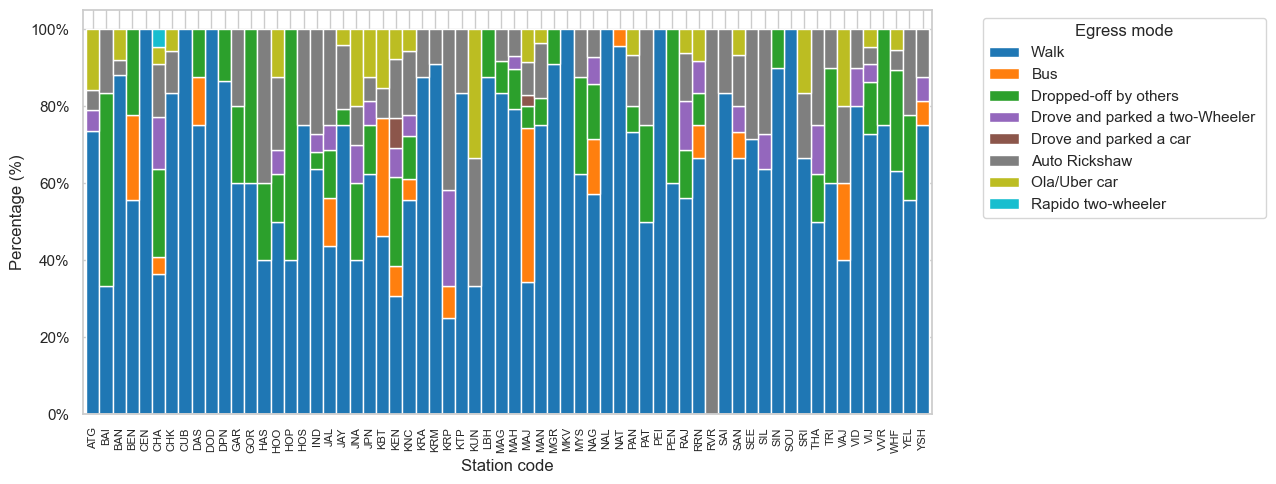

In [ ]:
# Grouping by '2c' and '10' and calculating the percentages
grouped = df.groupby(['2d', '11']).size().unstack().div(df.groupby('2d').size(), axis=0)

# Reorder the columns so that 'Walk' and other modes appear from the bottom
access_mode_order = ['Walk ','Bus',  'Dropped-off by others',
       'Drove and parked a two-Wheeler ', 'Drove and parked a car ',
       'Auto Rickshaw ', 'Ola/Uber car ', 'Rapido two-wheeler ']  # Add or adjust based on your data
grouped = grouped[access_mode_order]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(13, 5))
grouped.plot(kind='bar', stacked=True, colormap='tab10', ax=ax, width=1)
plt.xlabel('Station code')
plt.ylabel('Percentage (%)')
plt.xticks(fontsize=8, rotation=90)

# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

# Customize legend and move it outside the plot
legend = ax.legend(title='Egress mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to each segment of the bar chart
# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     if height > 0.01:  # Only show label if height is greater than 1% to avoid clutter
#         ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
display(HTML(f"<h2>Preference for using public sharing system for metro access/egress</h2>"))

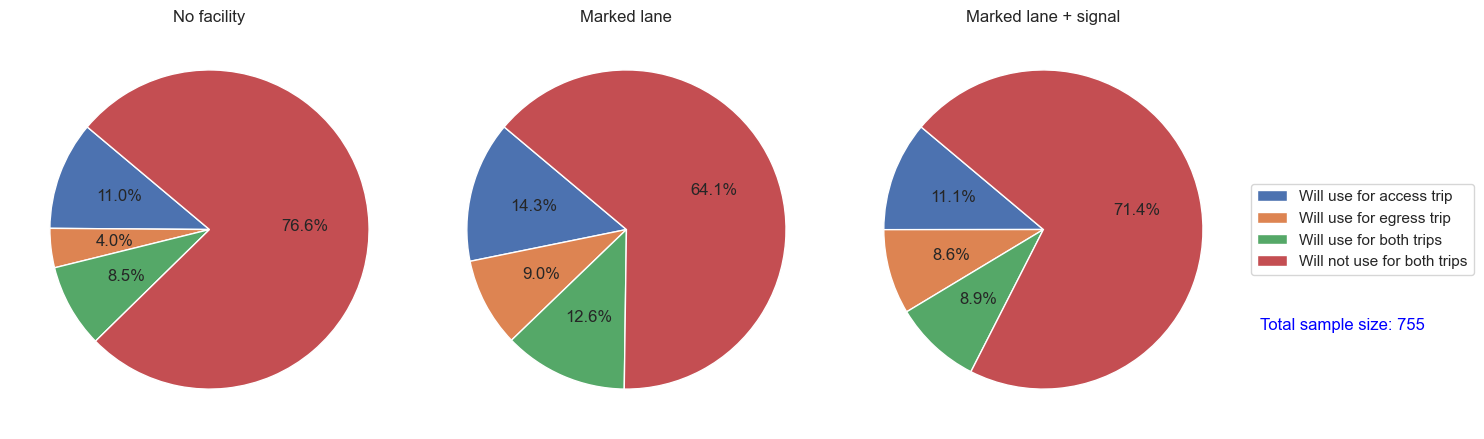

In [ ]:
columns = ['12c(a)', '12c(b)', '12c(c)']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Define individual titles for each plot
titles = ['No facility', 'Marked lane', 'Marked lane + signal']

# Initialize the figure
plt.figure(figsize=(15, 5))

# Loop through each column to create pie charts
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    # Ensure the values appear in the specified order
    values = [df[column].value_counts().get(label, 0) for label in list_order]
    plt.pie(values, autopct='%1.1f%%', startangle=140)
    plt.title(titles[i-1])

# Add a common legend for all pie charts
plt.legend(list_order, loc='center left', bbox_to_anchor=(1, 0.5))

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.9, 0.3, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

# Display the plots
plt.tight_layout()
plt.show()

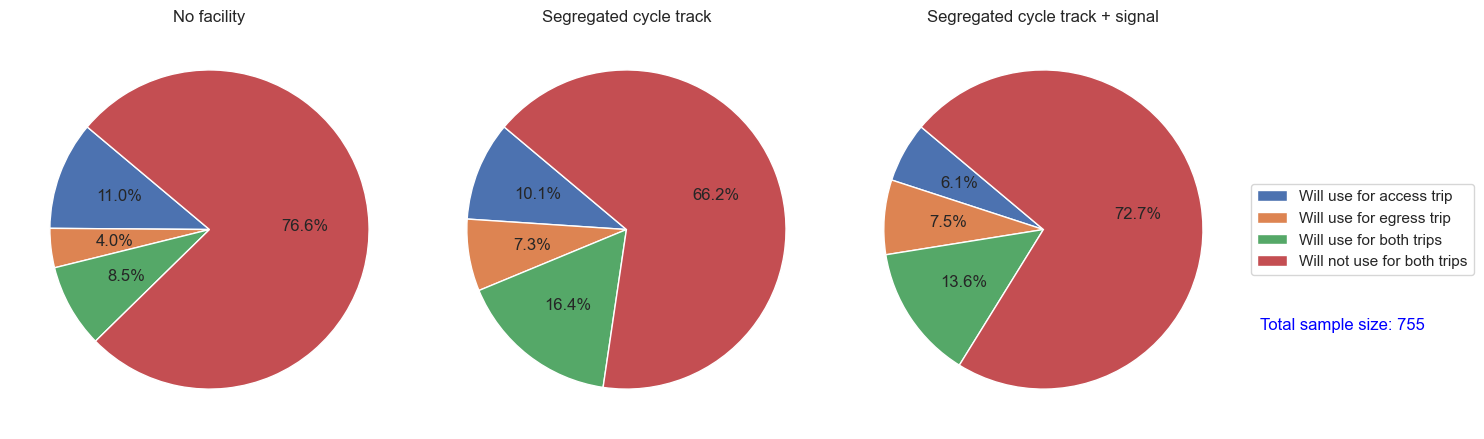

In [ ]:
columns = ['12c(a)', '12c(d)', '12c(e)']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Define individual titles for each plot
titles = ['No facility', 'Segregated cycle track', 'Segregated cycle track + signal']

# Initialize the figure
plt.figure(figsize=(15, 5))

# Loop through each column to create pie charts
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    # Ensure the values appear in the specified order
    values = [df[column].value_counts().get(label, 0) for label in list_order]
    plt.pie(values, autopct='%1.1f%%', startangle=140)
    plt.title(titles[i-1])

# Add a common legend for all pie charts
plt.legend(list_order, loc='center left', bbox_to_anchor=(1, 0.5))

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.9, 0.3, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
display(HTML(f"<h2>Preference for using own bicycle if parking facility is provided at metro stations</h2>"))

In [ ]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'Not Applicable',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .':
       'Segregated track + signal',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .':'Segregated track',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ':'Marked lane + signal',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ':'Marked lane',
       'Current travelling conditions with no special cycling facility.Additional cost Per Trip 0₹. ಯಾವುದೇ ವಿಶೇಷ ಸೈಕ್ಲಿಂಗ್ ಸೌಲಭ್ಯವಿಲ್ಲದೆ ಪ್ರಸ್ತುತ ಪ್ರಯಾಣದ ಪರಿಸ್ಥಿತಿಗಳು. ಪ್ರತಿ ಪ್ರವಾಸಕ್ಕೆ ಹೆಚ್ಚುವರಿ ವೆಚ್ಚ 0₹':'Current conditions',}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

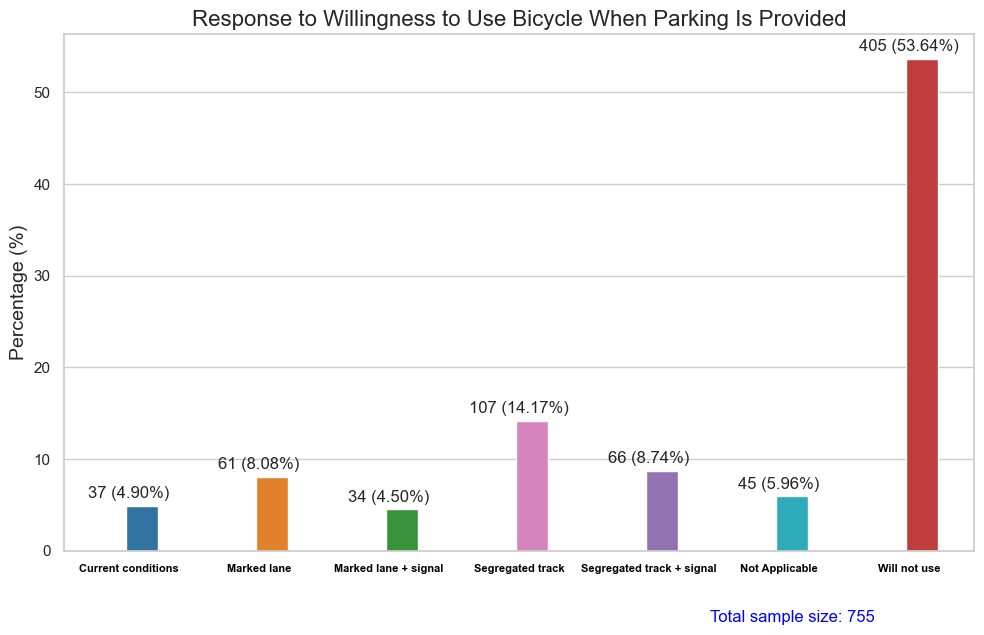

In [ ]:

ordered_list = ['Current conditions', 'Marked lane', 'Marked lane + signal', 
                'Segregated track', 'Segregated track + signal', 'Not Applicable', 'Will not use']

# Reorder the categories in column 23 based on the ordered list
df.loc[:, '23'] = pd.Categorical(df['23'], categories=ordered_list, ordered=True)

# Count the number of entries for each category
counts = df['23'].value_counts()

# Sort the counts based on the ordered list
counts = counts.reindex(ordered_list)

# Calculate the total count
total_count = counts.sum()

# Convert counts to percentages
percentages = (counts / total_count) * 100

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2', '#9467bd', '#17becf', '#d62728']

# Plot the bar chart with adjusted bar width
bar_width = 0.25  # Adjust bar width here
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette=colors, dodge=False, errorbar=None)

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(bar_width)
    bar.set_x(bar.get_x() + (1 - bar_width) / 2)  # Center the bars

# Add count values and percentages on top of each bar
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(i, percentage + 0.5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', fontsize=12)

# Add category labels directly on the x-axis with matching colors
ax.set_xticklabels(percentages.index, rotation=0, ha='center', fontsize=10, fontweight='bold', color='black')

# Color the x-axis labels to match the bar colors
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)

plt.title('Response to Willingness to Use Bicycle When Parking Is Provided', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=8)

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.8, -0.05, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

plt.tight_layout()
plt.show()


In [ ]:
map_24={'Need to carry things or travelling with someone. ':'Need to carry things or travelling with someone. ',
       'Cannot ride a bicycle or health constraints. ':'Cannot ride a bicycle or health constraints. ',
       'Do not feel safe about traffic along my route. ':'Do not feel safe about traffic along my route. ',
       'Concerns about being tired and sweaty. ':'Concerns about being tired and sweaty. ',
       'Concern about pollution along my route. ':'Concern about pollution along my route. ',
       'The distance between metro station and home is in walkable distance ':'Short distance',
       'Cannot ride a bicycle or health constraints. , uncomfortable to ride bicycle ': 'Cannot ride a bicycle or health constraints. ',
       'Cannot ride a bicycle or health constraints. , uncomfortable ': 'Cannot ride a bicycle or health constraints. ',
       'Concerns about road quality such as potholes. ':'Concerns about road quality such as potholes. ',
       'My working place is nearby I can walk ':'Short distance',
       "I don't know how to ride bicycle ":'Cannot ride a bicycle or health constraints. ',
       'Not required. Since shorter distance.':'Short distance',
        'I prefer motor cycle.':'Prefer motor vehicle',
       'Do not feel safe about traffic along my route. , Uncomfortable, aged': 'Cannot ride a bicycle or health constraints. ',
       'Concerns about being tired and sweaty. , feels uncomfortable ':'Concerns about being tired and sweaty. ',
       'Cannot ride a bicycle or health constraints. , Uncomfortable in saree, age issues': 'Cannot ride a bicycle or health constraints. ',
       'Cannot ride a bicycle or health constraints. , Aged': 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Both origin and desitination are near to metrostation':'Short distance',
       'Concerns about being tired and sweaty. , Aged': 'Cannot ride a bicycle or health constraints. ',
       'Both metro stations are near ':'Short distance',
       'Cannot ride a bicycle or health constraints. , aged': 'Cannot ride a bicycle or health constraints. ',
       'Do not feel safe about traffic along my route. , Not near to my home location ':'Very long distance',
       'Not near to my location ':'Very long distance',
       'Not required. Since short distance can be done by walking.':'Short distance',
       "I don't know how to ride cycle": 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Walkable distance from home to metro station ':'Short distance',
       'Cannot ride a bicycle or health constraints. , Metro station are not near by home location ':'Short distance',
       'Cannot ride a bicycle or health constraints. , Uncomfortable in saree': 'Cannot ride a bicycle or health constraints. ',
       "Do not feel safe about traffic along my route. , Don't know to use bicycle ": 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Feel uncomfortable ':'Need to carry things or travelling with someone. ',
       "Concerns about being tired and sweaty. , Walkable distance from home and I don't like to ride bicycle ":'Short distance',
       'Walkable distance from home ':'Short distance',
       "Cannot ride a bicycle or health constraints. , Had leg injury can't ride cycle": 'Cannot ride a bicycle or health constraints. ',
       "Concerns about being tired and sweaty. , I don't like to use bicycle ":'Concerns about being tired and sweaty. ',
       'Walkable distance from home to metro station ':'Short distance',
       'Walkable distance ':'Short distance',
       'Do not feel safe about traffic along my route. , Uncomfortable in saree ':'Do not feel safe about traffic along my route. ',
       'Cannot ride a bicycle or health constraints. , both are in walkable distance ':'Short distance',
        "Walkable distance, so I don't wish to use cycel":'Short distance',
         'Walking is convenient.':'Short distance',
         'Do not feel safe about traffic along my route. , uncomfortable':'Do not feel safe about traffic along my route. ',
            'Metro station is very near to the home':'Short distance',
           'Cannot ride a bicycle or health constraints. , Uncomfortable':'Cannot ride a bicycle or health constraints. ',
             'Do not feel safe about traffic along my route. , aged':'Do not feel safe about traffic along my route. ', 
             'Do not feel safe about traffic along my route. , aged':'Do not feel safe about traffic along my route. ',
           'Cannot ride a bicycle or health constraints. , Aged, uncomfortable in saree':'Do not feel safe about traffic along my route. ',
             'Do not feel safe about traffic along my route. , uncomfortable ':'Do not feel safe about traffic along my route. ',
             'Occasionally I visits my friend. So not required of anything else.':'Need to carry things or travelling with someone. ',
               'Walkable distance from home':'Short distance', 
               "I don't like to use bicycle ":'Cannot ride a bicycle or health constraints. ', 
             "Need to carry things or travelling with someone. , It's not time saving ":'Need to carry things or travelling with someone. ', 
         'Need to carry things or travelling with someone. , Not required. Since short distances for both destinations.':'Need to carry things or travelling with someone. '
         }

#print the unique values in column 24 which are not the keys in above dictionary
print(set(df['24'].unique())-set(map_24.keys()))


{nan}


In [ ]:
df['24'].unique()

df['24']=df['24'].map(map_24).fillna(df['24'])

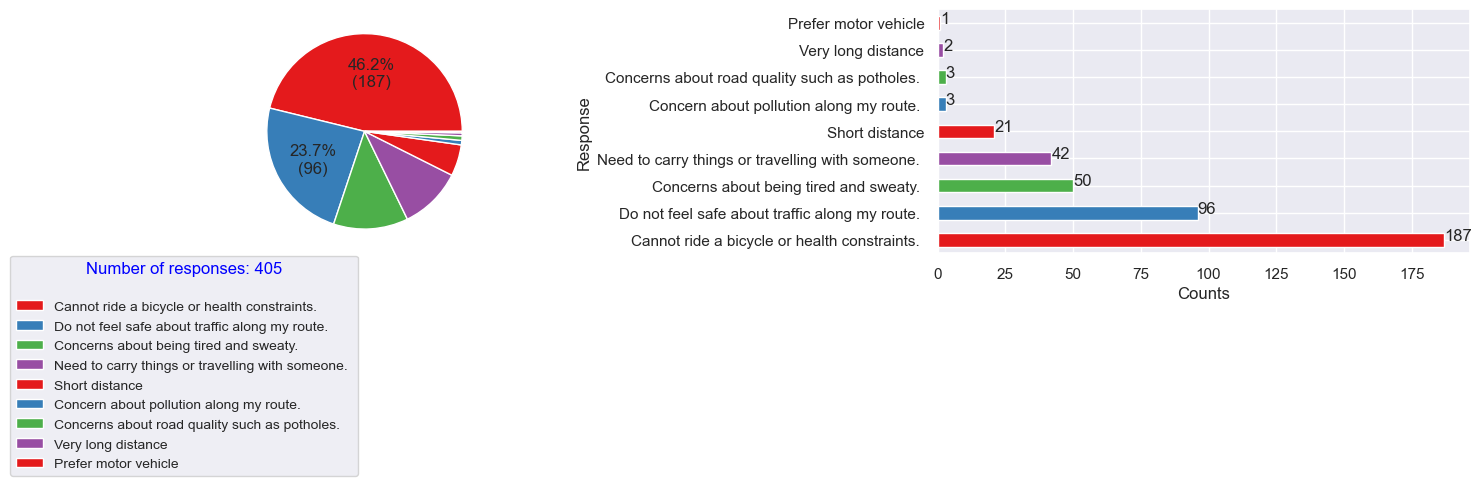

In [ ]:
display(HTML(f"<h2>Reasons for not willing to use own bicycle</h2>"))


def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top sectors
def get_top_indices(counts, n=2):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:n]

# Set Seaborn style
sns.set(style="darkgrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_gender = sns.color_palette("Set1", len(df['8'].value_counts()))
colors_age = sns.color_palette("Set1", len(df['8'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for gender distribution
gender_counts = df['24'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[0], shadow=False, colors=colors_gender, labels=None
)
# ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')  # Remove y-label

non_na_count = df['24'].count()

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[0].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Number of responses: {non_na_count}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

# Horizontal bar chart for age distribution
age_counts = df['24'].value_counts()
age_counts.plot.barh(ax=ax[1], color=colors_age)
ax[1].set_xlabel('Counts')
ax[1].set_ylabel('Response')
# ax[1].set_title('Age Distribution')
for index, value in enumerate(age_counts):
    ax[1].text(value, index, str(value))

plt.tight_layout()
plt.show()

In [ ]:
df_modified= df[df['Timestamp'] < '2024-05-16 00:00:00']
display(HTML(f"<h2>Number of samples before modifying the options related to signal: {df_modified.shape[0]}</h2>"))

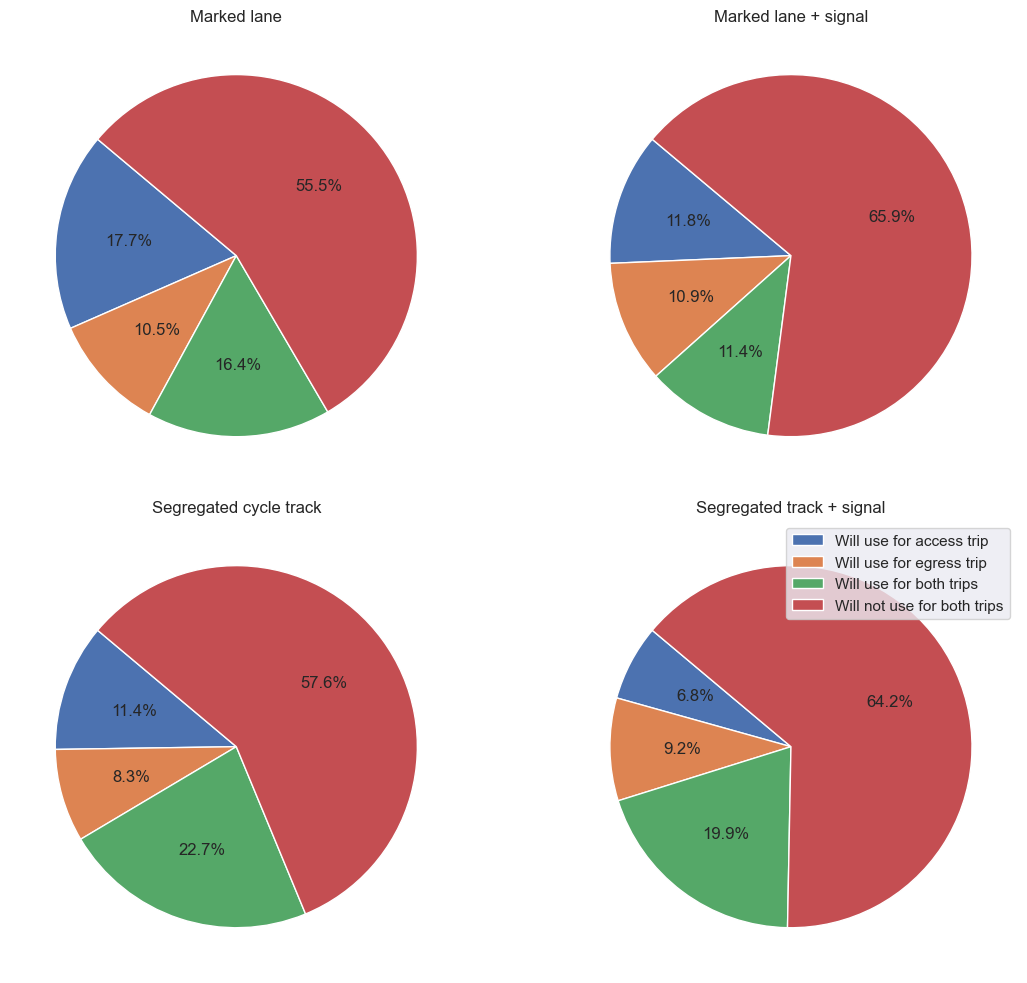

In [ ]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df_modified[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

In [ ]:
df_modified= df[df['Timestamp'] > '2024-05-16 00:00:00']
display(HTML(f"<h2>Number of samples after modifying the options related to signal: {df_modified.shape[0]}</h2>"))

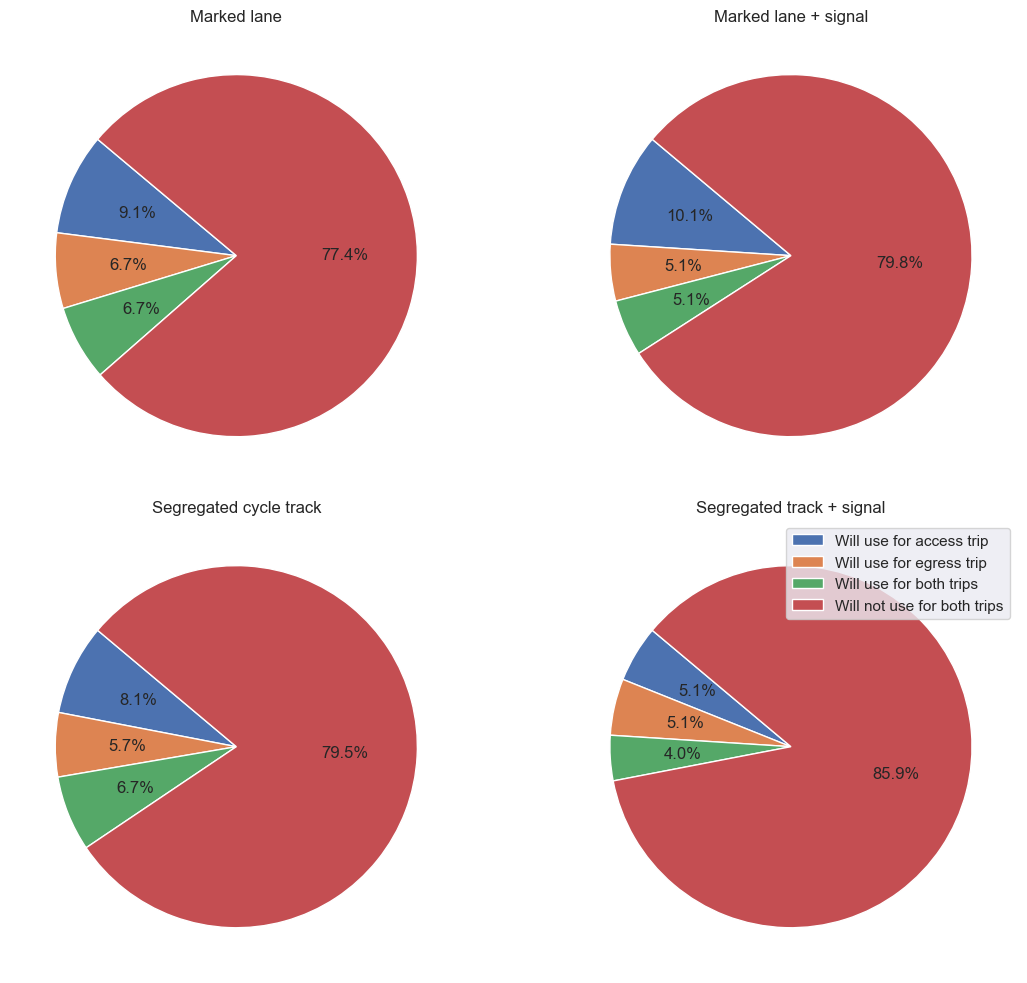

In [ ]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df_modified[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

In [ ]:
df['19'].value_counts()

19
Graduate                      461
12th Std.                     126
Trade/Diploma Certificate      62
Postgraduate                   51
10th Std.                      36
< 10th Std.                    12
Doctorate                       7
Name: count, dtype: int64